In [70]:
#First visualize RNN Results
import numpy as np
%matplotlib inline  
import glob,h5py,os,re
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\usepackage{amsfonts}','\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
import cPickle as pickle
from datasets.synthp import params_synthetic

markers  = {}
markers[0]  = 'v'
markers[1] = '<'
markers[2]  = '>'
markers[3]  = '8'
markers[4] = '1'
markers[5]  = 'p'
markers[6]  = 's'
markers[7]  = 's'
markers[8] = 's'
markers[9] = 'v'

colors   = {}
colors[0]  = 'k'
colors[1] = 'b'
colors[2]  = 'g'
colors[3]  = 'y'
colors[4] = 'r'
colors[5]  = 'c'
colors[6]  = '#FF6347'
colors[7]  = '#FF6347'
colors[8] = '#C0C0C0'
colors[9] = 'g'


def getHDF5Data(f):
    ff = h5py.File(f,mode='r')
    alldata = {}
    for k in ff.keys():
        alldata[k] = ff[k].value
    return alldata
def getPKLData(f):
    with open(f,'rb') as f:
        data = pickle.load(f)
    return data
def getCode(f):
    rd =  float(f.split('-rd-')[1].split('-uid')[0].replace('_','.').replace('0000','0'))
    rs =  f.split('-rs-')[1].split('-')[0]
    return 'rs-'+rs+'-rd'+str(rd)

Updating best to:  rs: 400 rv: 0.05 rd: 0.3
************
Best Config:  ../../expt-medical/chkpt_filtered3months_indicators-rnn/LSTM_lr-8_0000e-04-nl-relu-opt-adam-bs-250-ep-500-rs-400-rd-3_0000e-01-uid-EP480-stats.h5
Best Validation NLL:  7.01574362548  at epoch:  40.0


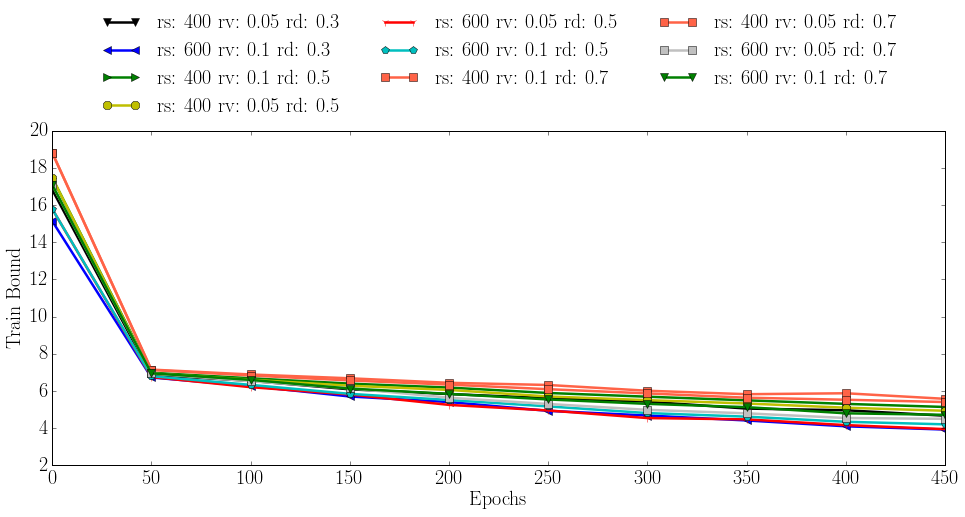

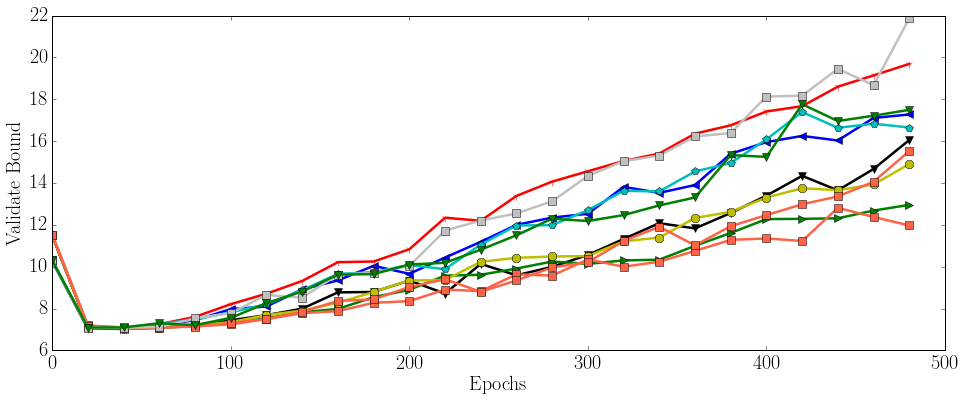

In [71]:
DIR = '../../expt-medical/chkpt_filtered3months_indicators-rnn'
fig_train,axlist_train = plt.subplots(1,1,figsize = (16,6))
fig_valid,axlist_valid = plt.subplots(1,1,figsize = (16,6))

def plotBounds(ax, x, y,c, m, label = None):
    ax.plot(x,y,label = label,marker =m, color=c)

bestValid,bestEpoch = np.inf,0
for idx,f in enumerate(glob.glob(DIR+'/*EP480-stats.h5')):
    params= getPKLData(f.replace('EP480-stats.h5','config.pkl'))
    label = 'rs: '+str(params['rnn_size'])+' rv: '+str(params['reg_value'])+' rd: '+str(params['rnn_dropout'])
    data = getHDF5Data(f)
    X = data['train_nll'][::50,0]
    Y = data['train_nll'][::50,1]
    plotBounds(axlist_train, X,Y,colors[idx],markers[idx],label=label)
    X = data['valid_nll'][:,0]
    Y = data['valid_nll'][:,1]
    plotBounds(axlist_valid, X,Y,colors[idx],markers[idx],label=label)
    if np.min(Y)<bestValid:
        bestValid=np.min(Y)
        bestSetup=f
        bestEpoch=data['valid_nll'][np.argmin(Y),0]
        print 'Updating best to: ',label
    
ax = axlist_train
ax.set_xlabel('Epochs')
ax.set_ylabel('Train Bound')

ax = axlist_valid
ax.set_xlabel('Epochs')
ax.set_ylabel('Validate Bound')

axlist_train.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),ncol=3, frameon=False)

print '************'
print 'Best Config: ',bestSetup
print 'Best Validation NLL: ',bestValid,' at epoch: ',bestEpoch